In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x, y = torch.load('C:\\users\\julia\\data_science_projects\\PyTorchTutorial\\MNIST\\processed\\training.pt')

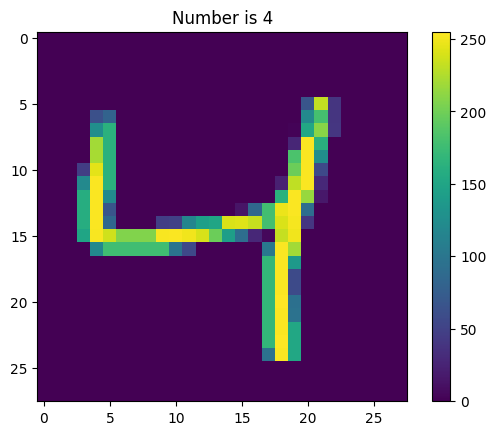

In [11]:
plt.imshow(x[2].numpy())
plt.title(f'Number is {y[2].numpy()}')
plt.colorbar()
plt.show()

In [15]:
y[2].numpy()

array(4, dtype=int64)

In [16]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_new = F.one_hot(y_original)

In [17]:
y_original

tensor([2, 4, 3, 0, 1])

In [18]:
y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [19]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [20]:
y_new = F.one_hot(y, num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [24]:
y_new[2]

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [25]:
x.shape

torch.Size([60000, 28, 28])

In [26]:
x.view(-1,28**2).shape

torch.Size([60000, 784])

In [28]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255. # normalize between 0 and 1
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [29]:
train_ds = CTDataset('C:\\users\\julia\\data_science_projects\\PyTorchTutorial\\MNIST\\processed\\training.pt')
test_ds = CTDataset('C:\\users\\julia\\data_science_projects\\PyTorchTutorial\\MNIST\\processed\\test.pt')

In [32]:
len(train_ds)

60000

In [33]:
xs, ys = train_ds[0:4]

In [34]:
ys.shape

torch.Size([4, 10])

In [35]:
train_dl = DataLoader(train_ds, batch_size=5)

In [36]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [37]:
len(train_dl) # 12000 batches of 5 images and labels for a total of 60000 images

12000

In [38]:
L = nn.CrossEntropyLoss()

In [39]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2) # ex batch size 5: turns images into 784 (28*28) length vectors
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [40]:
f = MyNeuralNet()

In [41]:
xs.shape

torch.Size([4, 28, 28])

In [42]:
f(xs)

tensor([[-0.0115,  0.1158, -0.0259,  0.0734, -0.0020, -0.1416, -0.1571,  0.2213,
          0.1018, -0.1778],
        [-0.0048,  0.1148, -0.0366,  0.0661,  0.0292, -0.1360, -0.1412,  0.2129,
          0.0873, -0.1375],
        [-0.0384,  0.0940, -0.0158,  0.0503,  0.0647, -0.1126, -0.0835,  0.1584,
          0.0733, -0.1393],
        [ 0.0186,  0.1032, -0.0108,  0.0641,  0.0246, -0.1217, -0.1141,  0.1810,
          0.0581, -0.1364]], grad_fn=<SqueezeBackward0>)

In [43]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [44]:
L(f(xs), ys)

tensor(2.3073, dtype=torch.float64, grad_fn=<DivBackward1>)

In [45]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl) # 12000 batches of 5 images
        # Loops 12000 times
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            # Store training data
            epochs.append(epoch+i/N) # i / N tells us how far we are into the dataset
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [46]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

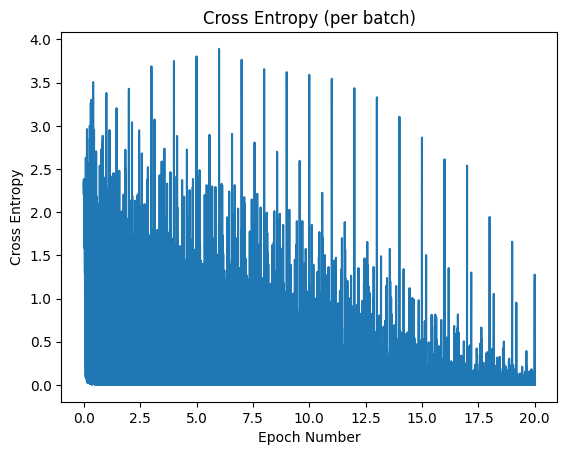

In [47]:
# 12000 * 20 adjustments to the model
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [48]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

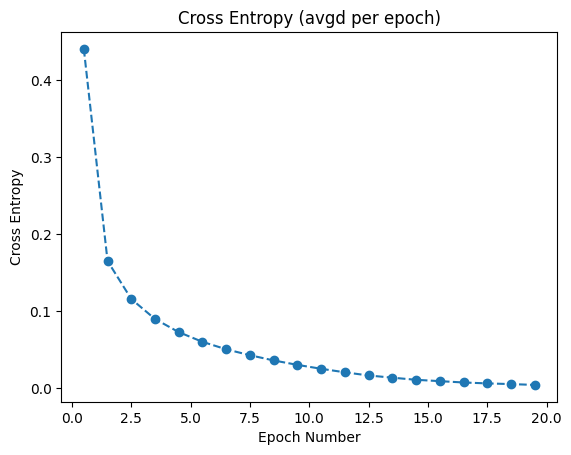

In [49]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [50]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [51]:
x_sample = train_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample

tensor([ -5.5458,   1.2591,   0.9758,  23.8465, -23.0598,  28.1353, -18.7114,
         -5.7240, -12.6638,   2.6806], grad_fn=<SqueezeBackward0>)

In [52]:
torch.argmax(yhat_sample)

tensor(5)

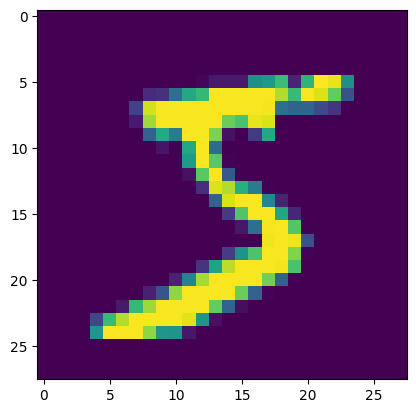

In [53]:
plt.imshow(x_sample)

In [54]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)

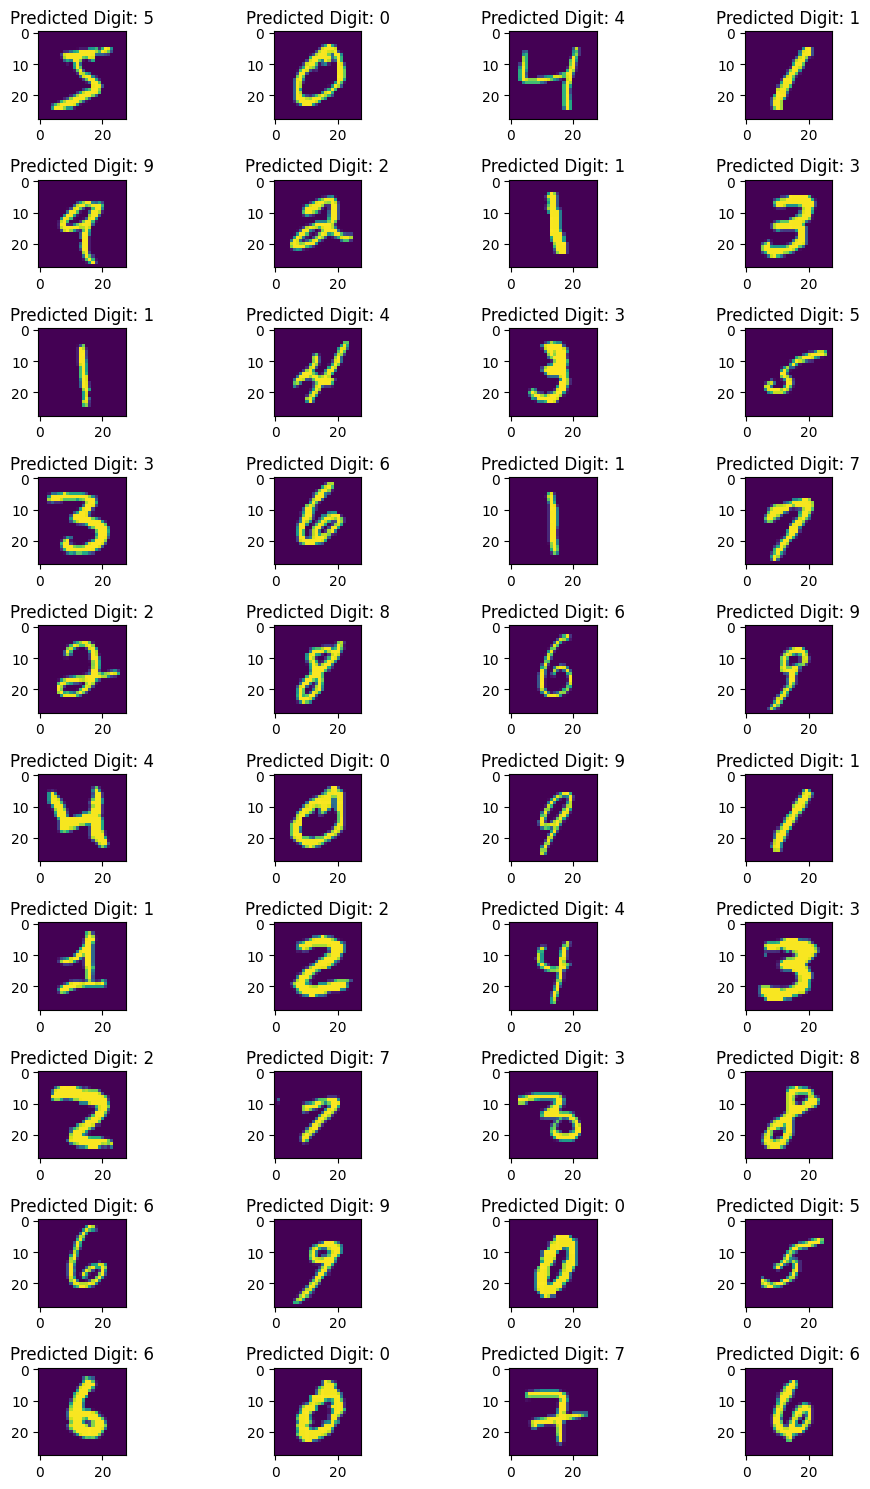

In [55]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

In [56]:
xs, ys = test_ds[:2000]
yhats = f(xs).argmax(axis=1)

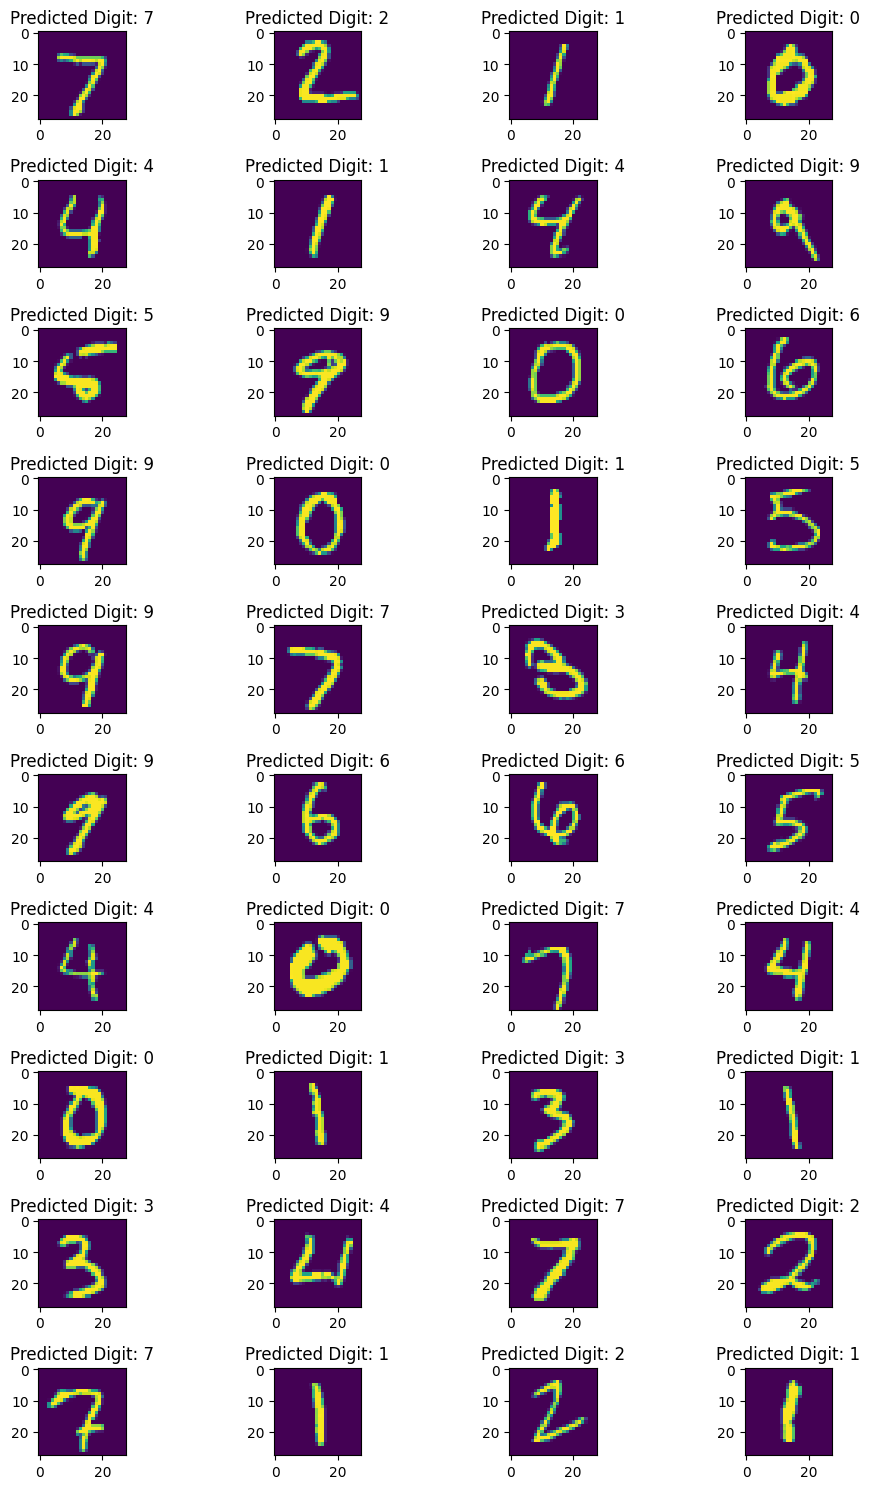

In [57]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()